In [1]:
"""
Created on Apr 2022

@authors: jkiederle
"""

from sklearn.metrics.cluster import normalized_mutual_info_score, mutual_info_score, adjusted_mutual_info_score
from numpy import linalg as LA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df_matrix_approx_entire = pd.read_csv (r'fixed_df_matrix_approx_entire.csv', index_col=0)
df_matrix_gurobi_entire = pd.read_csv (r'fixed_df_matrix_gurobi_entire.csv', index_col=0)
df_tree_edit = pd.read_csv(r'df_tree_edit_similarity.csv', index_col=0)
df_functional_matrix = pd.read_csv(r'functional_similarity_GO.csv', index_col=0)

In [35]:
cropped_functional = df_functional_matrix[df_matrix_approx_entire.index].loc[df_matrix_approx_entire.index]

In [17]:
np_gurobi_entire_flat = df_matrix_gurobi_entire.to_numpy().flatten()
np_approx_entire_flat = df_matrix_approx_entire.to_numpy().flatten()
np_tree_edit_flat = df_tree_edit.to_numpy().flatten()
np_crop_func_flat = cropped_functional.to_numpy().flatten()

dist_approx = df_matrix_approx_entire.to_numpy() - cropped_functional.to_numpy()
dist_gurobi = df_matrix_gurobi_entire.to_numpy() - cropped_functional.to_numpy()
dist_tree_edit = df_tree_edit.to_numpy() - cropped_functional.to_numpy()

In [18]:
norm_mi_approx = normalized_mutual_info_score(np_approx_entire_flat, np_crop_func_flat)
adjusted_mi_approx = adjusted_mutual_info_score(np_approx_entire_flat, np_crop_func_flat)
mi_approx = mutual_info_score(np_approx_entire_flat, np_crop_func_flat)

In [19]:
norm_mi_gurobi = normalized_mutual_info_score(np_gurobi_entire_flat, np_crop_func_flat)
adjusted_mi_gurobi = adjusted_mutual_info_score(np_gurobi_entire_flat, np_crop_func_flat)
mi_gurobi = mutual_info_score(np_gurobi_entire_flat, np_crop_func_flat)

In [20]:
norm_mi_tree_edit = normalized_mutual_info_score(np_tree_edit_flat, np_crop_func_flat)
adjusted_mi_tree_edit = adjusted_mutual_info_score(np_tree_edit_flat, np_crop_func_flat)
mi_tree_edit = mutual_info_score(np_tree_edit_flat, np_crop_func_flat)

In [21]:
corr_approx = np.corrcoef(np_approx_entire_flat,np_crop_func_flat)[0,1]
corr_gurobi = np.corrcoef(np_gurobi_entire_flat,np_crop_func_flat)[0,1]
corr_tree_edit = np.corrcoef(np_tree_edit_flat,np_crop_func_flat)[0,1]

In [22]:
frobenius_approx = LA.norm(dist_approx)
frobenius_gurobi = LA.norm(dist_gurobi)
frobenius_tree_edit = LA.norm(dist_tree_edit)

In [23]:
summary_df = pd.DataFrame(np.array([[mi_approx, mi_gurobi, mi_tree_edit], [norm_mi_approx, norm_mi_gurobi, norm_mi_tree_edit], [adjusted_mi_approx, adjusted_mi_gurobi, adjusted_mi_tree_edit], [corr_approx, corr_gurobi, corr_tree_edit], [frobenius_approx, frobenius_gurobi, frobenius_tree_edit]]), columns=['approx', 'gurobi', 'tree edit'], index=['mi', 'normalized mi', 'adjusted mi', 'correlation coeff', 'frobenius of dist'])

In [24]:
summary_df

,approx,gurobi,tree edit
mi,0.021171,0.029058,0.104970
normalized mi,0.011517,0.014430,0.042055
adjusted mi,0.008014,0.010401,0.035793
correlation coeff,0.132672,0.120689,0.247642
frobenius of dist,1466.148355,2175.703564,9239.195311


In [25]:
##### now normalized ####

In [37]:
df_approx = pd.read_csv (r'normalized_approx.csv', index_col=0)
df_gurobi = pd.read_csv (r'normalized_gurobi.csv', index_col=0)
df_tree_edit = pd.read_csv(r'df_tree_edit_similarity.csv', index_col=0)         
df_functional_matrix = pd.read_csv(r'functional_similarity_GO.csv', index_col=0)

In [38]:
cropped_functional = df_functional_matrix[df_matrix_approx_entire.index].loc[df_matrix_approx_entire.index]

In [39]:
np_gurobi = df_gurobi.to_numpy().flatten()
np_approx = df_approx.to_numpy().flatten()
np_tree_edit_flat = df_tree_edit.to_numpy().flatten()
np_crop_func_flat = cropped_functional.to_numpy().flatten()

dist_approx = df_approx.to_numpy() - cropped_functional.to_numpy()
dist_gurobi = df_gurobi.to_numpy() - cropped_functional.to_numpy()
dist_tree_edit = df_tree_edit.to_numpy() - cropped_functional.to_numpy()

In [44]:
norm_mi_approx = normalized_mutual_info_score(np_approx, np_crop_func_flat)
adjusted_mi_approx = adjusted_mutual_info_score(np_approx, np_crop_func_flat)
mi_approx = mutual_info_score(np_approx, np_crop_func_flat)

norm_mi_gurobi = normalized_mutual_info_score(np_gurobi, np_crop_func_flat)
adjusted_mi_gurobi = adjusted_mutual_info_score(np_gurobi, np_crop_func_flat)
mi_gurobi = mutual_info_score(np_gurobi, np_crop_func_flat)

norm_mi_tree_edit = normalized_mutual_info_score(np_tree_edit_flat, np_crop_func_flat)
adjusted_mi_tree_edit = adjusted_mutual_info_score(np_tree_edit_flat, np_crop_func_flat)
mi_tree_edit = mutual_info_score(np_tree_edit_flat, np_crop_func_flat)

corr_approx = np.corrcoef(np_approx,np_crop_func_flat)[0,1]
corr_gurobi = np.corrcoef(np_gurobi,np_crop_func_flat)[0,1]
corr_tree_edit = np.corrcoef(np_tree_edit_flat,np_crop_func_flat)[0,1]

frobenius_approx = LA.norm(dist_approx)
frobenius_gurobi = LA.norm(dist_gurobi)
frobenius_tree_edit = LA.norm(dist_tree_edit)

/home/jana/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/home/jana/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/home/jana/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/home/jana/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, U

In [42]:
summary_df = pd.DataFrame(np.array([[mi_approx, mi_gurobi, mi_tree_edit], [norm_mi_approx, norm_mi_gurobi, norm_mi_tree_edit], [adjusted_mi_approx, adjusted_mi_gurobi, adjusted_mi_tree_edit], [corr_approx, corr_gurobi, corr_tree_edit], [frobenius_approx, frobenius_gurobi, frobenius_tree_edit]]), columns=['approx', 'gurobi', 'tree edit'], index=['mi', 'normalized mi', 'adjusted mi', 'correlation coeff', 'frobenius of dist'])

In [43]:
summary_df

,approx,gurobi,tree edit
mi,0.195201,0.234876,0.104970
normalized mi,0.060726,0.070811,0.042055
adjusted mi,0.040633,0.048536,0.035793
correlation coeff,0.286788,0.289271,0.247642
frobenius of dist,26.486498,26.332980,9239.195311


In [ ]:
####   empiric approx ratios ####

In [61]:
ratios = np_gurobi / np_approx

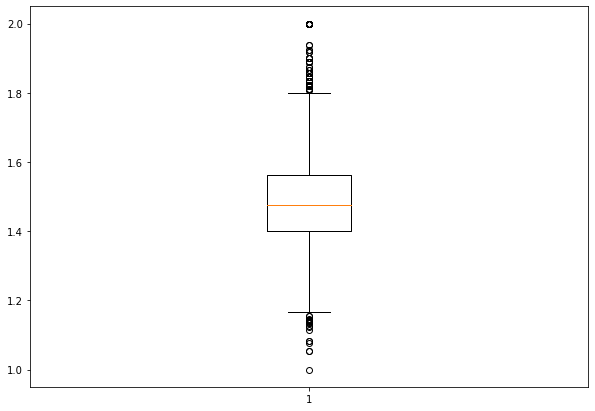

In [62]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(ratios)
 
# show plot
plt.show()

In [ ]:
#### boxplots for scalability test ###

In [10]:


def get_times_dict(algorithm, algorithm_small):
    times_dict = {}
    for max_n in [20,40]:
        path = "/home/jana/Documents/BIONETs/Code/tree_match_approx_validator/final_results_data/results/scalability_" + algorithm_small + "/" + str(max_n) + "_results_" + algorithm + "_Mar_30_2022-22_58/df_times_" + algorithm + ".csv"
        df = pd.read_csv(path, index_col=0)
        df_np = df.to_numpy()
        block_times = df_np[df_np>0]
        times_dict[str(max_n)] = block_times
    return times_dict

In [11]:
algorithm_small = 'gurobi'  #change name if called differently
algorithm = "GUROBI"
times_dict = get_times_dict(algorithm, algorithm_small)


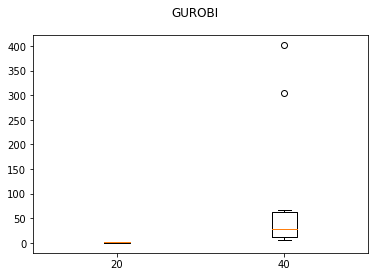

In [12]:
fig, ax = plt.subplots()
fig.suptitle(algorithm)
ax.boxplot(times_dict.values())
ax.set_xticklabels(times_dict.keys())
plt.show()